In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
%matplotlib inline
import re

In [171]:
smile = pd.read_csv('../data/smile_clean.csv')

1. Who has Smile On been serving (number of patients, age, gender, etc.)?

In [172]:
smile_groupby_patient = smile.groupby('patient_id')

In [173]:
#What's with this -1 value?
smile['patient_id'].value_counts()

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 3760121     1
 4430838     1
 3041278     1
 2752531     1
 2764490     1
Name: patient_id, Length: 10711, dtype: int64

In [174]:
smile.iloc[:,~smile.columns.duplicated()]

,Unnamed: 0,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,PostalCode,EnteredByWorkerNum,EnteredOn,ReferralsMade,Demographic Information - # of People in Household,Birth Year,Demographic Information - Other Language,1351,1354,2140,2150,2160,2161,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7286,7310,7311,7320,7321,7410,7411,7413,7414,7471,7510,7970 - Maxillary Quantity,7971,7972,9110,9951,Lab Assist narrative,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Dental Clinic,Base-line Oral and Conditions Questions - Did the client commit to referral?,Base-line Oral and Conditions Questions - Did you help in these other areas?,Base-line Oral and Conditions Questions - Do you need help in these other areas?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Base-line Oral and Conditions Questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Demographic Information - Gender,Demographic Information - Household Income Level,Demographic Information - How did you first hear about the program?,Demographic Information - Preferred Language/Language Needed,Demographic Information - Race/Ethnicity,Demographic Information - What other assistance programs are you on?,Demographic Information - When is the last time you visited your dentist?,Action: Upload After Picture on Finish Tab,Is the treatment plan completed?,Was a treatment plan developed?,"Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",What care was provided to the enrollee? (Select all that apply),Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - Do they pre-qualify for ?,Presumptive Eligibility - What is the next step for clients encounter?,Presumptive Eligibility - What is the next step for clients encounter?,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,37167.0,123747,9/3

In [175]:
#Dropping the "What is the next step for the clients" columns as they are duplicated and dtale wont import with them. 
smile = smile.drop(smile.columns[[104, 105]], axis=1)
smile.head(1)

,Unnamed: 0,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,PostalCode,EnteredByWorkerNum,EnteredOn,ReferralsMade,Demographic Information - # of People in Household,Birth Year,Demographic Information - Other Language,1351,1354,2140,2150,2160,2161,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7286,7310,7311,7320,7321,7410,7411,7413,7414,7471,7510,7970 - Maxillary Quantity,7971,7972,9110,9951,Lab Assist narrative,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Dental Clinic,Base-line Oral and Conditions Questions - Did the client commit to referral?,Base-line Oral and Conditions Questions - Did you help in these other areas?,Base-line Oral and Conditions Questions - Do you need help in these other areas?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Base-line Oral and Conditions Questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Demographic Information - Gender,Demographic Information - Household Income Level,Demographic Information - How did you first hear about the program?,Demographic Information - Preferred Language/Language Needed,Demographic Information - Race/Ethnicity,Demographic Information - What other assistance programs are you on?,Demographic Information - When is the last time you visited your dentist?,Action: Upload After Picture on Finish Tab,Is the treatment plan completed?,Was a treatment plan developed?,"Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",What care was provided to the enrollee? (Select all that apply),Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - What is the next step for clients encounter?,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,37167.0,123747,9/30/2021 16:57,NaN,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [176]:
#importing dtale
import dtale
d = dtale.show(smile)
#open in browser
d.open_browser()

In [177]:
#Filter for duplicate patient id
duplicates = smile.duplicated(['patient_id'], keep='first')
smile = smile[~duplicates]
if isinstance(smile, (pd.DatetimeIndex, pd.MultiIndex)):
	smile = smile.to_frame(index=False)

#Delete the negative patient ids

In [178]:
smile = smile[smile.patient_id != -1]

In [179]:
smile = smile[smile.patient_id != -2]

In [180]:
smile = smile.drop(columns = ['Unnamed: 0'])

In [181]:
smile.shape

(10709, 122)

#Get calls by county

Text(0, 0.5, 'County Name')

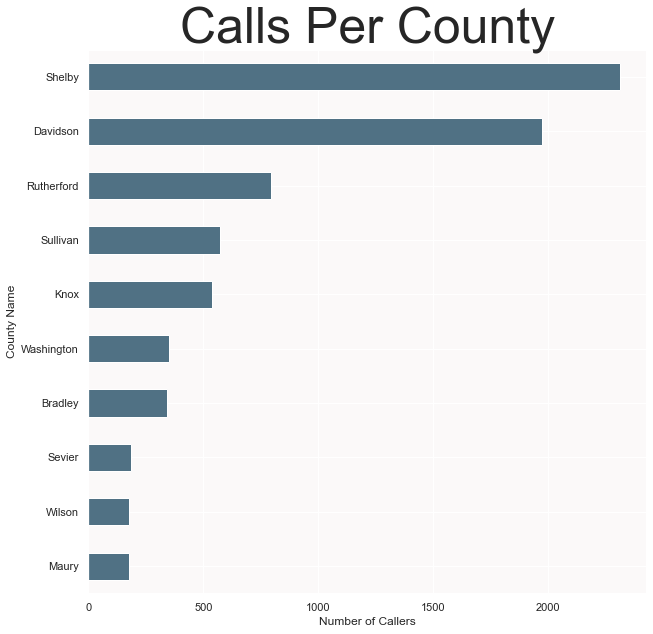

In [239]:
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
smile.CountyName.value_counts().nlargest(10).sort_values().plot.barh( figsize = (10, 10), color = '#507184ff')
plt.title('Calls Per County', fontsize =50) 
plt.xlabel('Number of Callers')
plt.ylabel('County Name')


#Create smaller df of columns I need. 

In [183]:
smile = smile.rename(columns={smile.columns[83]: 'transportation', smile.columns[92]: 'hear', smile.columns[102]: 'insurance',smile.columns[103]: 'pre_qualify'})

In [184]:
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
smile.head(20)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,PostalCode,EnteredByWorkerNum,EnteredOn,ReferralsMade,Demographic Information - # of People in Household,Birth Year,Demographic Information - Other Language,1351,1354,2140,2150,2160,2161,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7286,7310,7311,7320,7321,7410,7411,7413,7414,7471,7510,7970 - Maxillary Quantity,7971,7972,9110,9951,Lab Assist narrative,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Dental Clinic,Base-line Oral and Conditions Questions - Did the client commit to referral?,Base-line Oral and Conditions Questions - Did you help in these other areas?,Base-line Oral and Conditions Questions - Do you need help in these other areas?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Base-line Oral and Conditions Questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,transportation,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Demographic Information - Gender,Demographic Information - Household Income Level,hear,Demographic Information - Preferred Language/Language Needed,Demographic Information - Race/Ethnicity,Demographic Information - What other assistance programs are you on?,Demographic Information - When is the last time you visited your dentist?,Action: Upload After Picture on Finish Tab,Is the treatment plan completed?,Was a treatment plan developed?,"Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",What care was provided to the enrollee? (Select all that apply),insurance,pre_qualify,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,37167.0,123747,9/30/2021 16:57,NaN,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referre

Text(0, 0.5, 'Number of Calls')

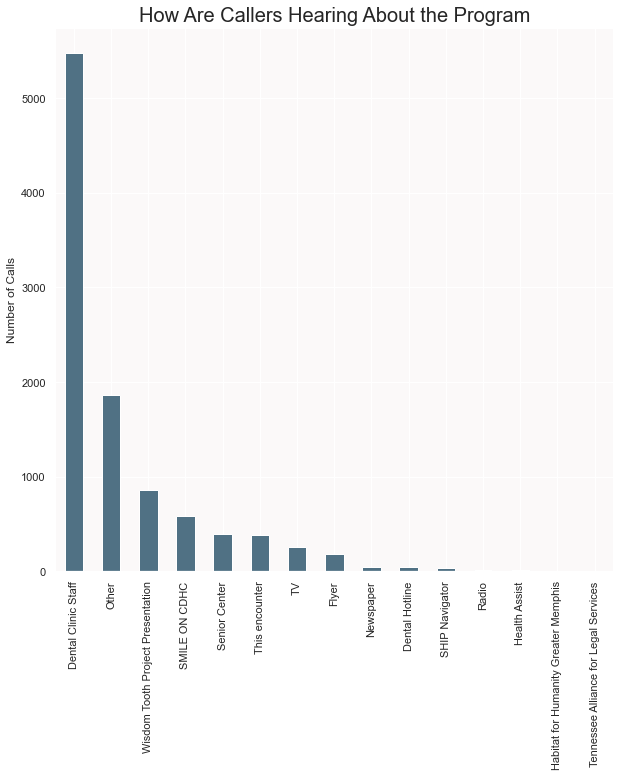

In [240]:
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
smile.hear.value_counts().plot.bar( figsize = (10, 10), color = '#507184ff')
plt.title('How Are Callers Hearing About the Program', fontsize = 20)
plt.ylabel('Number of Calls')

In [187]:
smile = smile.rename(columns = {smile.columns[84] : 'barriers' })

In [188]:
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
smile.head(1)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,PostalCode,EnteredByWorkerNum,EnteredOn,ReferralsMade,Demographic Information - # of People in Household,Birth Year,Demographic Information - Other Language,1351,1354,2140,2150,2160,2161,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7286,7310,7311,7320,7321,7410,7411,7413,7414,7471,7510,7970 - Maxillary Quantity,7971,7972,9110,9951,Lab Assist narrative,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Dental Clinic,Base-line Oral and Conditions Questions - Did the client commit to referral?,Base-line Oral and Conditions Questions - Did you help in these other areas?,Base-line Oral and Conditions Questions - Do you need help in these other areas?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Base-line Oral and Conditions Questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,transportation,barriers,Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Demographic Information - Gender,Demographic Information - Household Income Level,hear,Demographic Information - Preferred Language/Language Needed,Demographic Information - Race/Ethnicity,Demographic Information - What other assistance programs are you on?,Demographic Information - When is the last time you visited your dentist?,Action: Upload After Picture on Finish Tab,Is the treatment plan completed?,Was a treatment plan developed?,"Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",What care was provided to the enrollee? (Select all that apply),insurance,pre_qualify,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,37167.0,123747,9/30/2021 16:57,NaN,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,No insurance,NaN,NaN,NaN,NaN,NaN,Female,$0 - $21 280,Other,English,African American,S

#Pull the seperate values in the barriers column into another column

In [204]:
b = ['Dental Cost', 'No insurance', 'Transportation', 'Physical mobility and health', 'Fear', 'Personal isolation']
pat = '|'.join(r"\b{}\b".format(x) for x in b)


In [206]:
smile['barriers_seperate'] = smile['barriers'].str.extract('('+ pat + ')', expand=False, flags=re.I)
print (smile['barriers_seperate'])

0          No insurance
1           Dental cost
2           Dental cost
3           Dental cost
4        Transportation
              ...      
57827       Dental cost
57828       Dental cost
57831      No insurance
57834       Dental cost
57847       Dental cost
Name: barriers_seperate, Length: 10709, dtype: object


In [207]:
smile['barriers_seperate'].value_counts()

Dental cost                     7274
No insurance                     809
Transportation                   788
Fear                             101
Physical mobility and health      35
Personal isolation                23
Name: barriers_seperate, dtype: int64

In [214]:
smile['barriers_seperate'].value_counts(normalize=True) * 100
#get the percentage of occurances

Dental cost                     80.553710
No insurance                     8.959025
Transportation                   8.726467
Fear                             1.118494
Physical mobility and health     0.387597
Personal isolation               0.254707
Name: barriers_seperate, dtype: float64

Text(0.5, 0, 'Barriers')

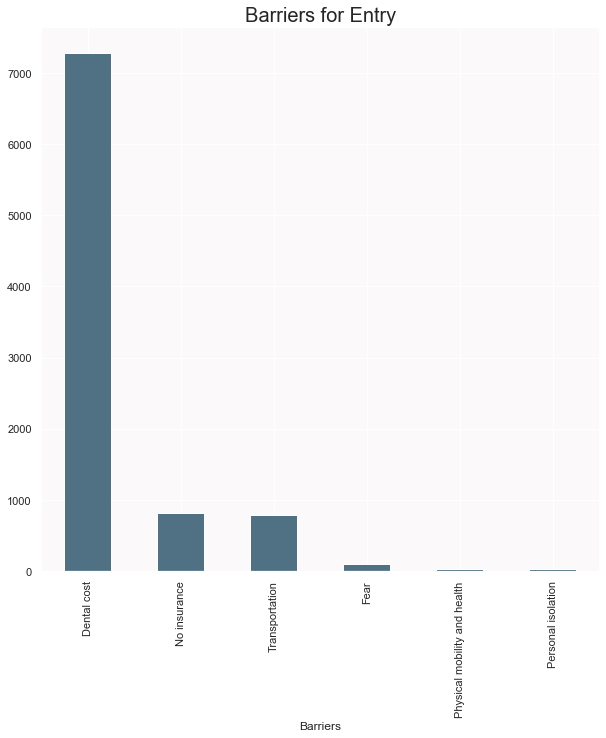

In [241]:
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
smile.barriers_seperate.value_counts().plot.bar( figsize = (10, 10), color = '#507184ff')
plt.title('Barriers for Entry', fontsize = 20)
plt.xlabel('Barriers')


There are several barriers keeping people from getting the help they need
    -81% of callers listed Dental Cost as being a reason they do not seek dental help.
    -9% of callers listed No insurance as a reason. 
    -Another 9% listed Transportation.
Cost, insurance and transportation could all be closely related factors. 

In [213]:
#importing dtale
import dtale
d = dtale.show(smile)
#open in browser
d.open_browser()

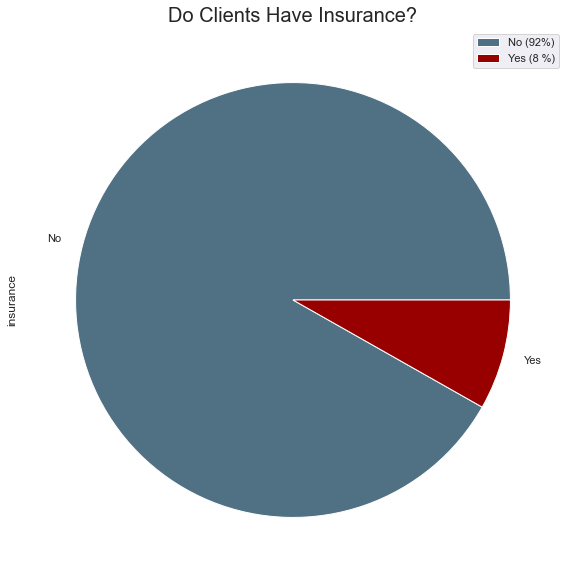

In [252]:
labels = [r'No (92%)', r'Yes (8 %)']
colors = ['#507184', '#980000']
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
smile.insurance.value_counts().plot.pie(figsize = (10,10), colors = colors)
plt.title('Do Clients Have Insurance?', fontsize = (20))
plt.legend(labels)

Only 8% of callers have insurance. This goes hand in hand with the entry barrier of cost. 

In [238]:
smile['insurance'].value_counts(normalize=True) * 100

No     91.800758
Yes     8.199242
Name: insurance, dtype: float64